## Test your knowledge - Dementia Dataset

Your training dataset also comes from [kaggle](https://www.kaggle.com/), a platform for data science competitions. The dataset is called [Dementia Prediction](https://www.kaggle.com/datasets/fatemehmehrparvar/dementia). The dataset is used to generate predictions of dementia using the simple MRI score and the amended MRI score. 

## Instructions

Load and examine the Dementia dataset (`data/Dementia.csv`). Based on what we just learned, answer the following questions:

1. **Data Understanding and Cleaning**
    - How many records and features are there in the dataset? Identify the number of numerical and categorical features.
    - Are there any missing values in the dataset? If so, in which columns and how many?
    - For numerical columns with missing values, calculate the mean and median. Decide which measure of central tendency is more appropriate for filling the missing values.
  
2. **Statistical Analysis and Visualization**
    - What is the age distribution of the individuals in the dataset? Plot a histogram of the age feature.
    - How does the number of years of education relate to the dementia_all feature? Plot a boxplot showing the distribution of education years for individuals with and without dementia.
    - Explore the relationship between gender and dementia. Calculate the percentage of individuals with dementia for each gender and create a bar plot.
    -**Bonus:** Investigate the prevalence of diabetes, smoking, hypertension, and hypercholesterolemia in the dataset. Create a bar plot for each condition.
  
3. **Advanced Analysis and Insights**
    - Analyze the relationship between the 'SVD Simple Score' and the 'SVD Amended Score'. Is there a strong correlation between these two scores? Use a scatter plot to visualize the relationship.
    - Compare the distribution of the 'PS' (Processing Speed) scores for different categories of the 'hypercholesterolemia' feature. Use a boxplot to visualize the comparison.
    -**Bonus:** Create a confusion matrix

In [9]:
# Load the Dementia dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Dementia.csv')
print(df.dtypes)
df.head()

ID                        int64
age                     float64
gender                   object
dementia                float64
dementia_all              int64
educationyears          float64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                  object
hypertension             object
hypercholesterolemia     object
lacunes_num              object
fazekas_cat              object
study                    object
study1                   object
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                object
CMB_count                object
dtype: object


,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


## 1 - Data Understanding and Cleaning

In [10]:
# How many records and features are there in the dataset? Identify the number of numerical and categorical features

print(f"#records: {df.shape[0]}, #features: {df.shape[1]}")
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(include=object).columns
print(f"#numerical features: {len(numerical_features)}, #categorical_features: {len(categorical_features)}")

#records: 1842, #features: 22
#numerical features: 12, #categorical_features: 10


In [15]:
# Are there any missing values in the dataset? If so, in which columns and how many?
# For numerical columns with missing values, calculate the mean and median. 
# Decide which measure of central tendency is more appropriate for filling the missing values - I decided to go with the median

for column in df.columns:
    num_of_missing_values = df[column].isnull().sum()
    if num_of_missing_values != 0:
        print(f"column {column} has {num_of_missing_values} missing values.")
        if column in numerical_features:
            print(f"Column mean: {df[column].mean()}, Column median: {df[column].median()}. Filling missing values with mean")
            df[column] = df[column].fillna(df[column].mean())

column smoking has 11 missing values.


## 2 - Statistical Analysis and Visualization

<Axes: xlabel='age', ylabel='Count'>

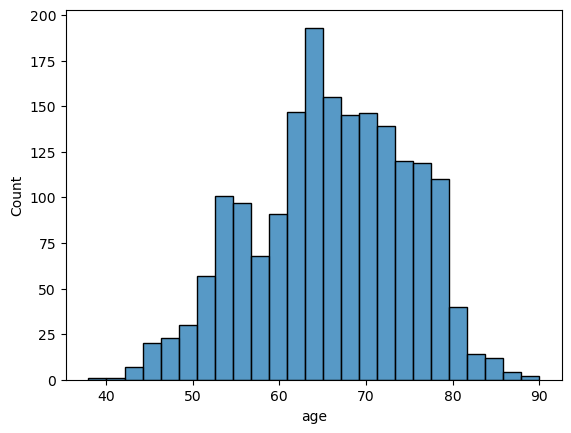

In [16]:
# What is the age distribution of the individuals in the dataset? Plot a histogram of the age feature.
sns.histplot(df['age'])


<Axes: xlabel='dementia_all', ylabel='educationyears'>

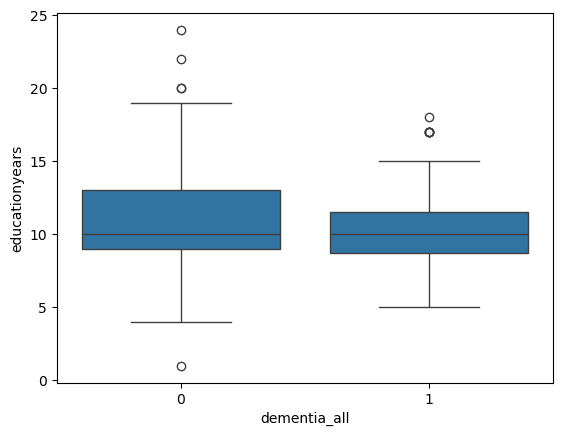

In [17]:
# How does the number of years of education relate to the dementia_all feature? 
# Plot a boxplot showing the distribution of education years for individuals with and without dementia.

sns.boxplot(x='dementia_all', y='educationyears', data=df)

Text(0, 0.5, 'dementia percentage')

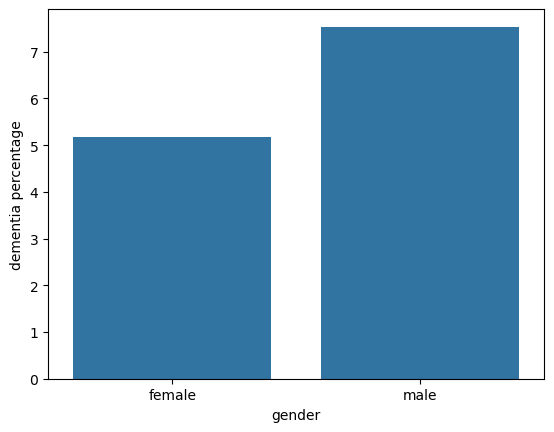

In [30]:
# Explore the relationship between gender and dementia. 
# Calculate the percentage of individuals with dementia for each gender and create a bar plot.

percentage_dementia = df.groupby('gender')['dementia_all'].mean() * 100
fig, ax = plt.subplots()
sns.barplot(percentage_dementia, ax=ax)
ax.set_ylabel('dementia percentage')


## 3 - Advanced Analysis and Insights

<Axes: xlabel='SVD Simple Score', ylabel='SVD Amended Score'>

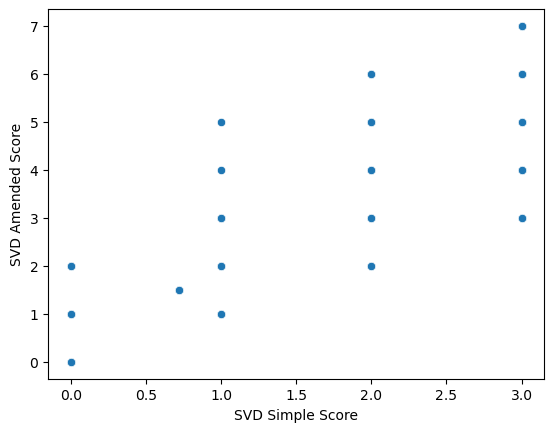

In [34]:
# Analyze the relationship between the 'SVD Simple Score' and the 'SVD Amended Score'. 
# Is there a strong correlation between these two scores? Use a scatter plot to visualize the relationship.

sns.scatterplot(x='SVD Simple Score', y='SVD Amended Score', data=df)

<Axes: xlabel='hypercholesterolemia', ylabel='PS'>

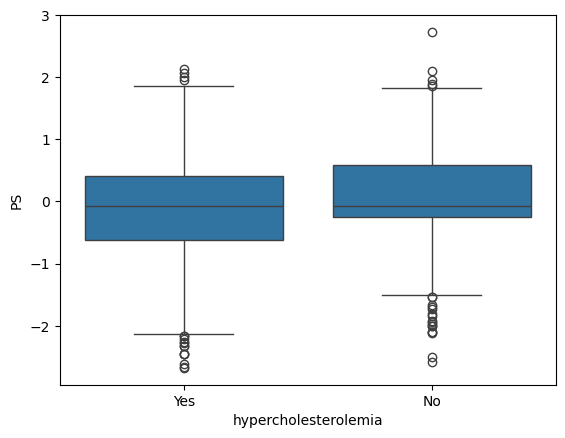

In [36]:
# Compare the distribution of the 'PS' (Processing Speed) scores for different categories of the 'hypercholesterolemia' feature. 
# Use a boxplot to visualize the comparison.

sns.boxplot(x='hypercholesterolemia', y='PS', data=df)